In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [11]:
df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding = 'latin1', sep= ';', decimal = ',')
filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df[filtro_presenca]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,2.100570e+11,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,2.100560e+11,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,2.100560e+11,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,2.100550e+11,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,2.100550e+11,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,2.100580e+11,2022,3,M,1,1,1,2,0,2,...,B,A,A,B,A,A,C,A,A,B
1048569,2.100570e+11,2022,2,F,1,3,1,2,0,2,...,B,A,A,B,A,A,E,A,A,B
1048570,2.100560e+11,2022,8,M,1,1,1,1,6,1,...,A,A,B,B,A,A,D,A,B,B
1048571,2.100580e+11,2022,3,F,1,3,1,1,1,1,...,A,A,A,C,A,A,E,A,B,B


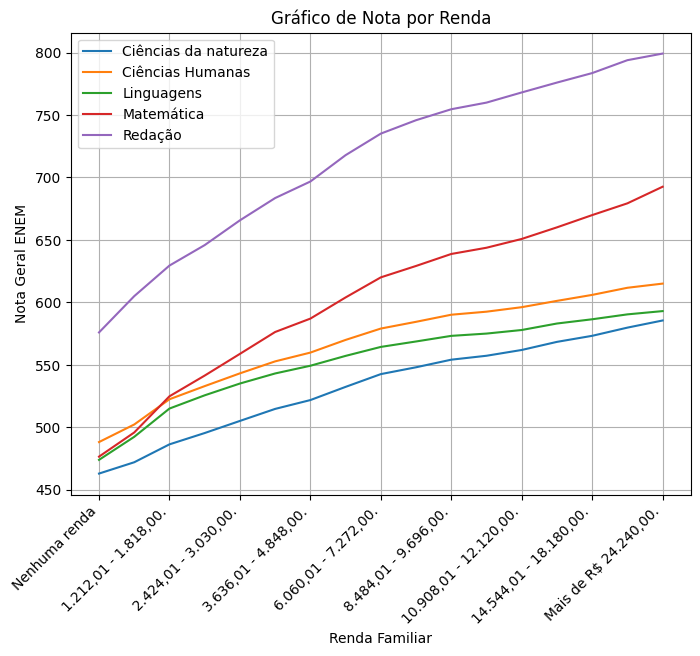

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';', decimal=',')
filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df_filtrado = df[filtro_presenca]

faixas_de_renda = {
    'A': 'Nenhuma renda',
    'B': 'Até R$ 1.212,00',
    'C': '1.212,01 - 1.818,00.',
    'D': '1.818,01 - 2.424,00.',
    'E': '2.424,01 - 3.030,00.',
    'F': '3.030,01 - 3.636,00.',
    'G': '3.636,01 - 4.848,00.',
    'H': '4.848,01 - 6.060,00.',
    'I': '6.060,01 - 7.272,00.',
    'J': '7.272,01 - 8.484,00.',
    'K': '8.484,01 - 9.696,00.',
    'L': '9.696,01 - 10.908,00.',
    'M': '10.908,01 - 12.120,00.',
    'N': '12.120,01 - 14.544,00.',
    'O': '14.544,01 - 18.180,00.',
    'P': '18.180,01 - 24.240,00.',
    'Q': 'Mais de R$ 24.240,00.'
    
}

plt.figure(figsize=(8, 6))

df_filtrado.loc[:, 'NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_CN'] = df_filtrado['NU_NOTA_CN'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_LC'] = df_filtrado['NU_NOTA_LC'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_MT'] = df_filtrado['NU_NOTA_MT'].astype(float)

media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
media_notas_por_renda.rename(index=faixas_de_renda, inplace=True)

media_notas_por_renda['NU_NOTA_CN'].plot(label='Ciências da Natureza')
media_notas_por_renda['NU_NOTA_CH'].plot(label='Ciências Humanas')
media_notas_por_renda['NU_NOTA_LC'].plot(label='Linguagens e Códigos')
media_notas_por_renda['NU_NOTA_MT'].plot(label='Matemática')
media_notas_por_renda['NU_NOTA_REDACAO'].plot(label='Redação')

plt.title('Gráfico de Nota por Renda')
plt.xlabel('Renda Familiar')
plt.ylabel('Nota Geral ENEM')
plt.grid(True)
plt.legend(['Ciências da natureza', 'Ciências Humanas','Linguagens','Matemática','Redação'])
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1000x700 with 0 Axes>

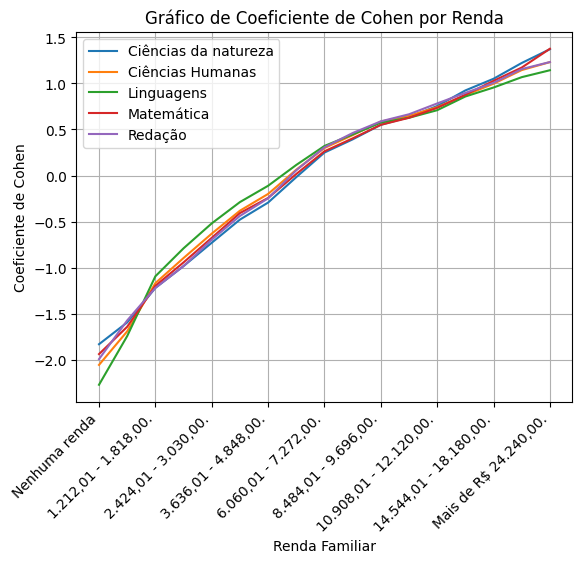

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';', decimal=',')

faixas_de_renda = {
    'A': 'Nenhuma renda',
    'B': 'Até R$ 1.212,00',
    'C': '1.212,01 - 1.818,00.',
    'D': '1.818,01 - 2.424,00.',
    'E': '2.424,01 - 3.030,00.',
    'F': '3.030,01 - 3.636,00.',
    'G': '3.636,01 - 4.848,00.',
    'H': '4.848,01 - 6.060,00.',
    'I': '6.060,01 - 7.272,00.',
    'J': '7.272,01 - 8.484,00.',
    'K': '8.484,01 - 9.696,00.',
    'L': '9.696,01 - 10.908,00.',
    'M': '10.908,01 - 12.120,00.',
    'N': '12.120,01 - 14.544,00.',
    'O': '14.544,01 - 18.180,00.',
    'P': '18.180,01 - 24.240,00.',
    'Q': 'Mais de R$ 24.240,00.'
    
}

filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df_filtrado = df[filtro_presenca]

notas_colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
# df_filtrado[notas_colunas] = df_filtrado[notas_colunas].apply(pd.to_numeric, errors='coerce')

df_filtrado = df_filtrado.dropna(subset=notas_colunas)

df_filtrado.loc[:, 'NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_CN'] = df_filtrado['NU_NOTA_CN'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_LC'] = df_filtrado['NU_NOTA_LC'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_MT'] = df_filtrado['NU_NOTA_MT'].astype(float)

media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
media_notas_por_renda.rename(index=faixas_de_renda, inplace=True)
media_todos_enem = df_filtrado[notas_colunas].mean()


media_das_medias = media_notas_por_renda.mean()
desvio_padrao_agregado = media_notas_por_renda.std()
d_cohen = (media_notas_por_renda - media_das_medias) / desvio_padrao_agregado

plt.figure(figsize=(10, 12))
d_cohen.plot(kind='line')
plt.title('Gráfico de Coeficiente de Cohen por Renda')
plt.xlabel('Renda Familiar')
plt.ylabel('Coeficiente de Cohen')
plt.grid(True)
plt.legend(['Ciências da natureza', 'Ciências Humanas','Linguagens','Matemática','Redação'])
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1000x700 with 0 Axes>

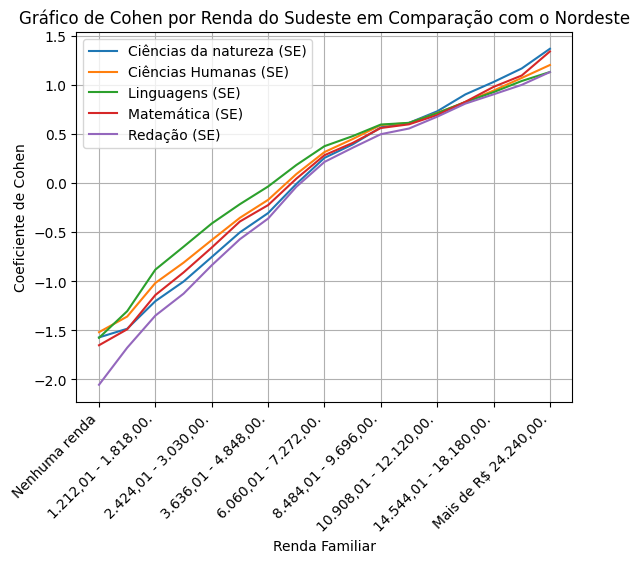

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';', decimal=',')

faixas_de_renda = {
    'A': 'Nenhuma renda',
    'B': 'Até R$ 1.212,00',
    'C': '1.212,01 - 1.818,00.',
    'D': '1.818,01 - 2.424,00.',
    'E': '2.424,01 - 3.030,00.',
    'F': '3.030,01 - 3.636,00.',
    'G': '3.636,01 - 4.848,00.',
    'H': '4.848,01 - 6.060,00.',
    'I': '6.060,01 - 7.272,00.',
    'J': '7.272,01 - 8.484,00.',
    'K': '8.484,01 - 9.696,00.',
    'L': '9.696,01 - 10.908,00.',
    'M': '10.908,01 - 12.120,00.',
    'N': '12.120,01 - 14.544,00.',
    'O': '14.544,01 - 18.180,00.',
    'P': '18.180,01 - 24.240,00.',
    'Q': 'Mais de R$ 24.240,00.'
    
}

def starts_with_2(x):
    return str(x).startswith('2')

def starts_with_3(x):
    return str(x).startswith('3')

def starts_with_2_or_3(x):
    return str(x).startswith('2') or str(x).startswith('3')

filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)

notas_colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

filtro_regiao_sudeste = df['CO_MUNICIPIO_PROVA'].apply(starts_with_3) & filtro_presenca
# filtro_regiao_nordeste = df['CO_MUNICIPIO_PROVA'].apply(starts_with_2) & filtro_presenca
filtro_total = df['CO_MUNICIPIO_PROVA'].apply(starts_with_2_or_3) & filtro_presenca

df_filtrado = df[filtro_total]
df_sudeste = df[filtro_regiao_sudeste]
# df_nordeste = df[filtro_regiao_nordeste]

df_sudeste.loc[:, 'NU_NOTA_REDACAO'] = df_sudeste['NU_NOTA_REDACAO'].astype(float)
df_sudeste.loc[:, 'NU_NOTA_CH'] = df_sudeste['NU_NOTA_CH'].astype(float)
df_sudeste.loc[:, 'NU_NOTA_CN'] = df_sudeste['NU_NOTA_CN'].astype(float)
df_sudeste.loc[:, 'NU_NOTA_LC'] = df_sudeste['NU_NOTA_LC'].astype(float)
df_sudeste.loc[:, 'NU_NOTA_MT'] = df_sudeste['NU_NOTA_MT'].astype(float)

df_filtrado.loc[:, 'NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_CN'] = df_filtrado['NU_NOTA_CN'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_LC'] = df_filtrado['NU_NOTA_LC'].astype(float)
df_filtrado.loc[:, 'NU_NOTA_MT'] = df_filtrado['NU_NOTA_MT'].astype(float)

media_notas_por_renda = df_filtrado.groupby('Q006')[notas_colunas].mean()
media_notas_por_renda.rename(index=faixas_de_renda, inplace=True)
media_notas_renda_sudeste = df_sudeste.groupby('Q006')[notas_colunas].mean()
media_notas_renda_sudeste.rename(index=faixas_de_renda, inplace=True)

media_notas = df_filtrado[notas_colunas].mean()

media_geral = media_notas_por_renda.mean()
media_sudeste = media_notas_renda_sudeste.mean()
desvio_padrao_agregado = media_notas_por_renda.std()
d_cohen_sudeste = (media_notas_renda_sudeste - media_geral) / desvio_padrao_agregado

plt.figure(figsize=(10, 7))
d_cohen_sudeste.plot(kind='line')
plt.title('Gráfico de Cohen por Renda do Sudeste em Comparação com o Nordeste')
plt.xlabel('Renda Familiar')
plt.ylabel('Coeficiente de Cohen')
plt.grid(True)
plt.legend(['Ciências da natureza (SE)', 'Ciências Humanas (SE)','Linguagens (SE)','Matemática (SE)','Redação (SE)'])
plt.xticks(rotation=45, ha='right')
plt.show()